## Data Visualization


## Table of contents
* [Setup]
* [Seaborn]
    * [KDE Plot](#kde)
    * [JointPLot/Scatter/Swarm/Hexagon](#sea_scatter)
    * [BoxPlot/ Violin](#sea_box)
    * [Multi_Graph](#sea_mult)
    * [Line Graph](#sea_line)
    * [Sea Bar/Heat/Overlapping Histograms](#sea_bar)
* [Plotly](#plotly_interact)
* [Plotnine_Cool Scatterplot](#plotnine)
* [Time Series](#time)


### Data Upload

In [11]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats #used to get correlation coefficient
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

#SET THE NUMBER OF ENTRIES DISPLAYED to two
pd.set_option("display.max_rows", 2)

# load Auto data
reviews = pd.read_csv('Data/module_5_auto.csv', index_col=0 )
cols= ['symboling', 'normalized-losses',
       'make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'horsepower-binned', 'diesel', 'gas']
df= df[cols]

#Load Wine Mag data
review = pd.read_csv("Data\winemag-data_first150k.csv", index_col=0)

#load Spotify data
spotify_data = pd.read_csv("Data\spotify.csv", index_col="Date", parse_dates=True)

#Load Flight Data
flight_data = pd.read_csv("Data\_flight_delays.csv", index_col="Month")

#Load Insureance data
insurance_data = pd.read_csv("Data\insurance.csv")

#Load Iris Data
iris_data = pd.read_csv("Data\iris.csv",index_col="Id")

#Load Wine COunts Data
wine_counts = pd.read_csv("Data\_top-five-wine-score-counts.csv",index_col=0)

#### KDE Plot <a name="kde"></a>

The is a convenient graph density graph that automatically get frequency. It's better!

KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

In [278]:
reviews.head(2)

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  

[2 rows x 29 columns]

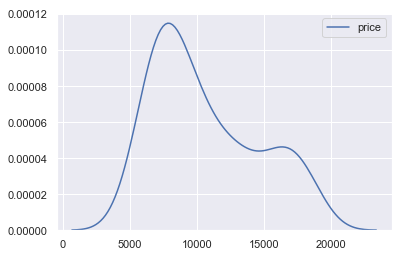

In [244]:
sns.set_style("darkgrid") #white, white-grid, ticks
sns.kdeplot(reviews.query('price < 19000').price)


Compare to the normal line graph

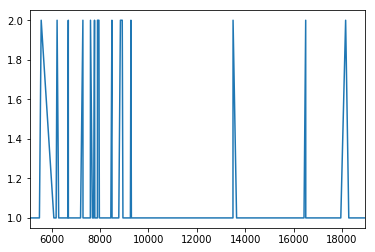

In [16]:
reviews[reviews['price'] < 19000]['price'].value_counts().sort_index().plot.line()

**KDE on two dimensions:**
Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots. They solve the same data overplotting issue that scatter plots suffer from and hex plots address, in a different but similarly visually appealing

In [12]:
k=reviews[reviews['price'] < 19000].loc[:, ['price', 'horsepower']]

sns.jointplot(x=k['price'], y=k['horsepower'], kind="kde")

### Seaborn Histogram and KDE plot together

You can place the kde=False to remove kde line graph 

In [21]:
sns.distplot(reviews['price'], bins=10)#, kde=False)

**JointPlot/Scatterplot/Hexagon** <a name="sea_scatter"></a> 

It has the advantage of putting density as well; JOINTPLOTS

Notice that this plot comes with some bells and whistles: a correlation coefficient is provided (used sci method), along with histograms on the sides.

In [302]:
#sns.set(style="darkgrid", color_codes=True)
j=sns.jointplot(x='price', y='horsepower', data=reviews[reviews['price'] < 19000])
j.annotate(stats.pearsonr)


<Figure size 1080x720 with 0 Axes>

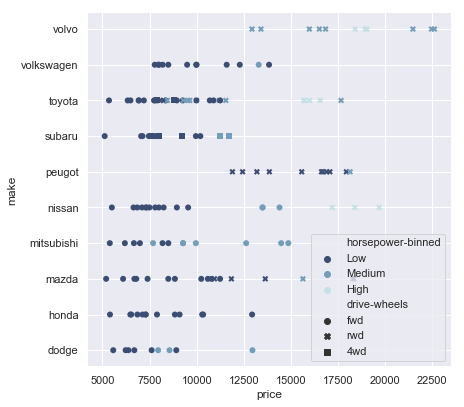

In [304]:
plt.figure(figsize=(15,10))

sns.set(style="darkgrid")

rf = reviews[reviews.make.isin(reviews.make.value_counts().head(10).index)]

# Draw a scatter plot while assigning point colors and sizes to different
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["Low", "Medium", "High"]
sns.scatterplot(x="price", y="make",
                hue="horsepower-binned", 
                style="drive-wheels",# CHNAGES THE MARKERS and another layer
                #size="drive-wheels",
                #markers=['x', 'o','s'],
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=rf, ax=ax)

Scatterplot on Insurance Data

In [306]:
insurance_data.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

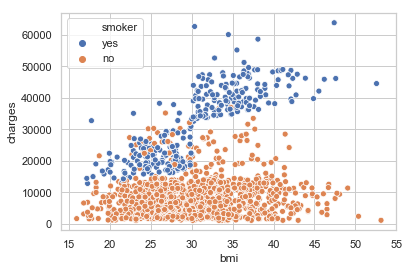

In [214]:

sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

In [289]:
sns.lmplot(x="bmi", y="charges", hue="smoker", 
           markers=['x', 's'], #you cna change markers
           data=insurance_data)

### Swarm Plot



In [308]:
insurance_data.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

In [217]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

**Hexagon Chart**:

It is density based scatterplot!

In [309]:
reviews.head(2)

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  

[2 rows x 29 columns]

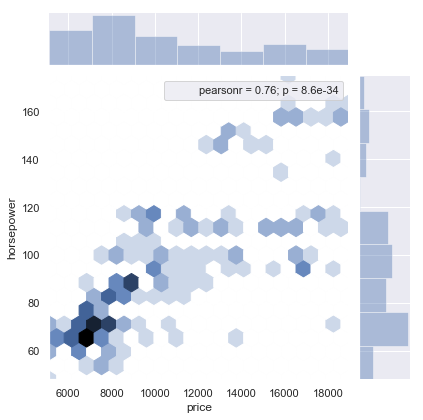

In [307]:

j=sns.jointplot(x='price', y='horsepower', data=reviews[reviews['price'] < 19000], kind='hex', gridsize=20)
j.annotate(stats.pearsonr)

**Boxplots** <a name="sea_box"></a>

Grouped by category (very attractive)

However, they only work for interval variables and nominal variables with a large number of possible values; they assume your data is roughly normally distributed (otherwise their design doesn't make much sense); and they don't carry any information about individual values, only treating the distribution as a whole.

In [310]:
reviews.head(2)

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  

[2 rows x 29 columns]

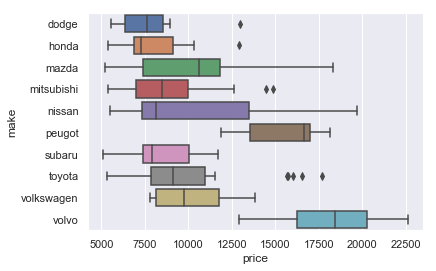

In [40]:
#takes subset of data of the top 10 makes after grouped by counts
rf = reviews[reviews.make.isin(reviews.make.value_counts().head(10).index)]

sns.boxplot(
    x='price',
    y='make',
    data=rf
)

The **Hue** features allows to distinguish data further!

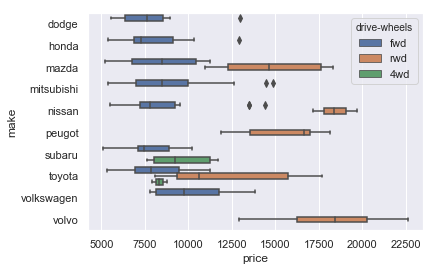

In [42]:
#takes subset of data of the top 10 makes after grouped by counts
rf = reviews[reviews.make.isin(reviews.make.value_counts().head(10).index)]

sns.boxplot(
    x='price',
    y='make',
    hue='drive-wheels',
    data=rf
)

**Violin Chart**: A more fancier boxplot


In [311]:
reviews.head(2)

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  

[2 rows x 29 columns]

In [57]:
sns.violinplot(
    x='price',
    y='make',
    data=reviews[reviews.make.isin(reviews.make.value_counts().head(5).index)]
)

In [80]:
plt.figure(figsize=(15,10))


sns.violinplot(
    x='make',
    y='price',
    data=reviews[reviews.make.isin(reviews.make.value_counts().head(5).index)]
)

**Multiple Bar Graphs** <a name="sea_mult"></a>

You can create multiple plots manually and also you can code pair wise versiona



symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  

[2 rows x 29 columns]

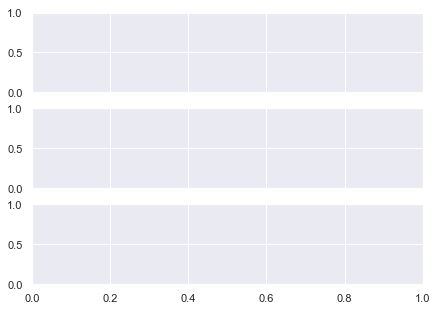

In [312]:
# Set up the matplotlib figure for separate graphs
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

reviews.head(2)

**Notice** the map designation when we plot the data

In [275]:
#special version and you control order of display
g = sns.FacetGrid(reviews, row="horsepower-binned", col="drive-wheels",
                row_order=['Low', 'Medium','High'],
                 col_order=['fwd', 'rwd', '4wd'],
                  margin_titles=True)
bins = np.linspace(5000, 20000, 13)
g.map(plt.hist, "price", color="steelblue", bins=bins)

### Pair Plot

What this graph does is provide a histogram and the correlation between the two variables

In [313]:
reviews.head(2)

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  

[2 rows x 29 columns]

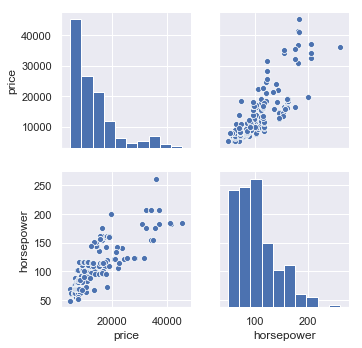

In [279]:
sns.pairplot(reviews[['price', 'horsepower']])

### Parallel Coordinates

It allows you to compare groups on all continuous characteristics of interest; Notice: how we can easily distinguigh between the species.

In [284]:
iris_data.head(2)

Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
Id                                                                             
1                 5.1               3.5                1.4               0.2   
2                 4.9               3.0                1.4               0.2   

        Species  
Id               
1   Iris-setosa  
2   Iris-setosa

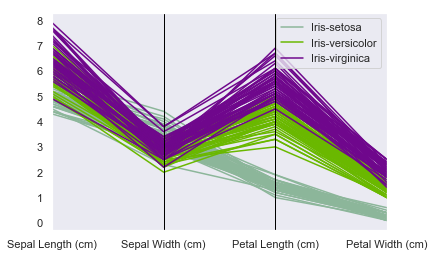

In [282]:

from pandas.plotting import parallel_coordinates

parallel_coordinates(iris_data, 'Species')

### Line graphs (using Seaborn) <a name="sea_line"></a>

Note that the date is the index of the graph!

In [316]:
spotify_data.tail(2)

Shape of You  Despacito  Something Just Like This    HUMBLE.  \
Date                                                                       
2018-01-08       4135505  2755266.0                 2023251.0  2523265.0   
2018-01-09       4168506  2791601.0                 2058016.0  2727678.0   

            Unforgettable  
Date                       
2018-01-08      2622693.0  
2018-01-09      2627334.0

Text(0.5, 0, 'Date')

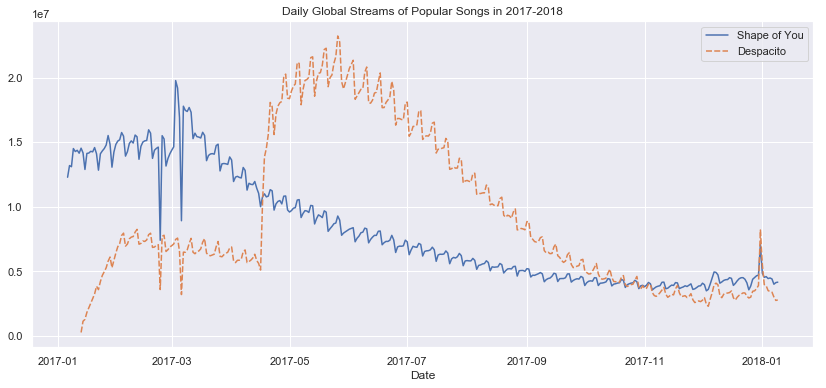

In [315]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

col= ['Shape of You','Despacito']

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data[col])

# Add label for horizontal axis
plt.xlabel("Date")


### Bar Graphs and Heat Maps <a name="sea_bar"></a>

Important Note: You must select the indexing column with flight_data.index

In [262]:
flight_data.head(2)

AA        AS         B6        DL         EV         F9  \
Month                                                                  
1      6.955843 -0.320888   7.347281 -2.043847   8.537497  18.357238   
2      7.530204 -0.782923  18.657673  5.614745  10.417236  27.424179   

             HA         MQ         NK         OO        UA        US  \
Month                                                                  
1      3.512640  18.164974  11.398054  10.889894  6.352729  3.107457   
2      6.029967  21.301627  16.474466   9.588895  7.260662  7.114455   

             VX        WN  
Month                      
1      1.420702  3.389466  
2      7.784410  3.501363

Text(0, 0.5, 'Arrival delay (in minutes)')

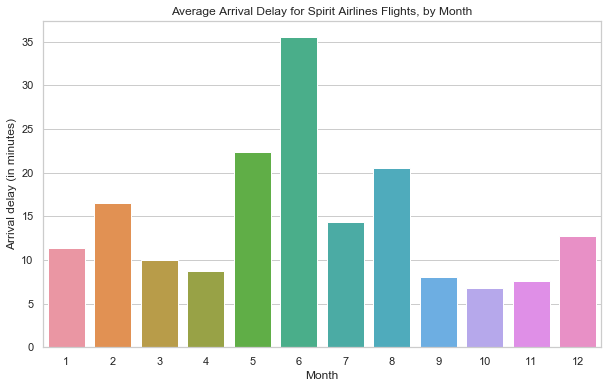

In [206]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

### Stacked Bar graph 

For graphing purposes, reduced the number of columns and used the mathpolt lib feature feature.
**Note**: Stacked area requires values to be all positive or negative

In [324]:
bf= flight_data[['NK','AA','AS']]

bf.plot.bar(stacked=True)
#bf.plot.area(stacked=True)

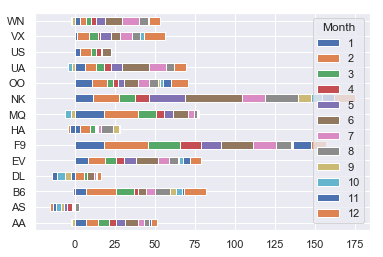

In [268]:
#Fullset with Transpose
sns.set()
flight_data.T.plot(kind='barh', stacked=True)

### Heatmap respect to the index

In [317]:
flight_data.head(2)

AA        AS         B6        DL         EV         F9  \
Month                                                                  
1      6.955843 -0.320888   7.347281 -2.043847   8.537497  18.357238   
2      7.530204 -0.782923  18.657673  5.614745  10.417236  27.424179   

             HA         MQ         NK         OO        UA        US  \
Month                                                                  
1      3.512640  18.164974  11.398054  10.889894  6.352729  3.107457   
2      6.029967  21.301627  16.474466   9.588895  7.260662  7.114455   

             VX        WN  
Month                      
1      1.420702  3.389466  
2      7.784410  3.501363

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month; $annotaion allow the values to be present
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

Text(0.5, 42.0, 'Airline')

### HeatMap (general)

Standard Correlation coefficent

In [293]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Relationship to each airline")

sns.heatmap(
    flight_data.corr(),
    annot=True
)

### Overlapping Histograms <a name="sea_overlap"></a>

I'm going to create a overlapping histogram of Petal length fro each species. Note: if kde=True; then a normal KDE plot occurs

In [280]:
iris_data.head(2)

Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
Id                                                                             
1                 5.1               3.5                1.4               0.2   
2                 4.9               3.0                1.4               0.2   

        Species  
Id               
1   Iris-setosa  
2   Iris-setosa

In [236]:
#Create separate dataframes
ira= iris_data[['Petal Length (cm)', 'Species']]
ira1= ira.query('Species== "Iris-setosa"')
ira2= ira.query('Species== "Iris-virginica"')
ira3= ira.query('Species== "Iris-versicolor"')

# Histograms for each species
sns.distplot(a=ira1['Petal Length (cm)'], label="Iris-setosa", kde=False)
sns.distplot(a=ira3['Petal Length (cm)'], label="Iris-versicolor", kde=False)
sns.distplot(a=ira2['Petal Length (cm)'], label="Iris-virginica", kde=False)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()



### Overlapping KDE plots

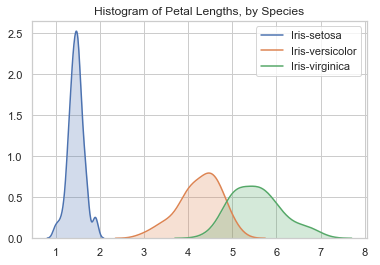

In [237]:

# KDE for each species
sns.kdeplot(data=ira1['Petal Length (cm)'], label="Iris-setosa", shade=True)
sns.kdeplot(data=ira3['Petal Length (cm)'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=ira2['Petal Length (cm)'], label="Iris-virginica", shade=True)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()


## Plotly Interactive Graphs! <a name="plotly_interact"></a>

plotly provides both online and offline modes. The latter injects the plotly source code directly into the notebook; the former does not. I recommend using plotly in offline mode the vast majority of the time, and it's the only mode that works on Kaggle (which disables network access in Python).

This chart also demonstrates the disadvantage of this fancier plotting library. In order to keep performance reasonable, we had to limit ourselves to the first 1000 points in the dataset. While this was necessary anyway (to avoid too much overplotting) it's important to note that in general, interactive graphics are much, much more resource-intensive than static ones. It's easier to "max out" how many points of data you can show.

In [295]:
review.head(2)

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      region_1 region_2             variety                   winery  
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez

In [14]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

iplot([go.Scatter(x=review.head(1000)['points'], y=review.head(1000)['price'], mode='markers')])

### Contour Histogram w/ scatterplot option

In [15]:
rr= review.query('price <120 and points < 96')

iplot([go.Histogram2dContour(x=rr['points'], 
                             y=rr['price'], 
                             contours=go.Contours(coloring='heatmap'))])#,
      # go.Scatter(x=review.head(1000)['points'], y=review.head(1000)['price'], mode='markers')])

C:\Users\17189\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:204: DeprecationWarning:

plotly.graph_objs.Contours is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.contour.Contours
  - plotly.graph_objs.surface.Contours
  - etc.




In [128]:
#Create a a groupby dataframe with column n with points
df = review.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
df = df[df["price"] < 100] #select less than 100 becuse where most points are located

#Creat a pivot table
v = df.pivot(index='price', columns='points', values='n').fillna(0).values.tolist()
iplot([go.Surface(z=v)])

## Chloropath Tables

Used in basic interactive maps; this one does not require Folium. Notice for the graph below; 'country names' is selected at the location mode

In [16]:
 review['country'].replace("US", "United States").value_counts()

United States    62397
                 ...  
US-France            1
Name: country, Length: 48, dtype: int64

In [17]:

df = review['country'].replace("US", "United States").value_counts()
#country is the index


iplot([go.Choropleth(
    locationmode='country names',
    locations=df.index.values, #designate location
    text=df.index, # selects value of text
    z=df.values #select vlaues
)])

## Plotnine Grammar Graphics  <a name="plotnine"></a>

Provides very streamline graphing tools

In [19]:
from plotnine import *

top_wines = review[review['variety'].isin(review['variety'].value_counts().head(5).index)]
df = top_wines.head(1000).dropna()
df.head(2)

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
3      US  This spent 20 months in 30% new French oak, an...   

         designation  points  price    province           region_1  \
0  Martha's Vineyard      96  235.0  California        Napa Valley   
3            Reserve      96   65.0      Oregon  Willamette Valley   

            region_2             variety winery  
0               Napa  Cabernet Sauvignon  Heitz  
3  Willamette Valley          Pinot Noir  Ponzi

#### Scatterplot

In [20]:
(ggplot(df)
     + aes('points', 'price') #Set up the points
     + aes(color='points') #creates the color scheme of x-axis
     + geom_point() #create cluster chart
     + stat_smooth() #create linear equatinou
     + facet_wrap('variety') #split by sub graphs 
)

<ggplot: (80047483477)>

**Histogram**

You can control the ratio of the table with ease, and the bins for a cluster map

In [160]:
(ggplot(top_wines)
     + aes('points')
     + geom_bar()
     #+ coord_fixed(ratio=0.001)
)

<ggplot: (-9223371904147017265)>

**Density Scatterplot**

In [153]:
(ggplot(top_wines)
         + aes('points', 'variety')
         + geom_bin2d(bins=20) #bins
         + coord_fixed(ratio=1) #ratio of size
         + ggtitle("Top Five Most Common Wine Variety Points Awarded")
)

<ggplot: (132704398719)>

### Time Series <a name="time"></a>

We will explore convenient ways to do timeseries analysis

In [323]:
import numpy as np

#Data Load
ff = pd.read_csv('Documents\GitHub\Coursera_Capstone\Saint Paul Project\Datasets\Traffic_Stop_Dataset.csv')
#More familar column names Column Names
cols= ['Year','Date','Race','Gender','Driver_search','Vehicle_search','Citation','Age','Reason','Grid','GridLocation', 'Count']
ff.columns= cols


In [325]:
ff['Date']= pd.to_datetime(ff['Date'])


In [326]:
ff.head(2)

Year                Date   Race  Gender Driver_search Vehicle_search  \
0  2001 2001-01-01 00:11:00  White  Female            No             No   
1  2001 2001-01-01 00:14:00  White    Male            No             No   

  Citation  Age   Reason   Grid                 GridLocation  Count  
0       No  NaN  No Data   55.0  (44.97391713, -93.06089457)      1  
1       No  NaN  No Data  106.0  (44.95211807, -93.15173337)      1

### Standard Timeseries 

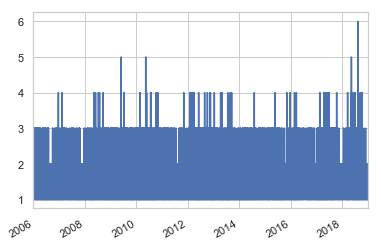

In [170]:
yy= ff.query('Year > 2005')
yy['Date'].value_counts().sort_values().plot.line()

### Time-Series by Month

In [173]:
ff['Date'].value_counts().resample('M').sum().plot.line()

### Time-Series by Year

In [172]:
ff['Date'].value_counts().resample('Y').sum().plot.line()


### Lag Plots

Find if previous value has influence with past value. The strategy would be best suited by sorting by time.

Time-series data tends to exhibit a behavior called **periodicity**: rises and peaks in the data that are correlated with time

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


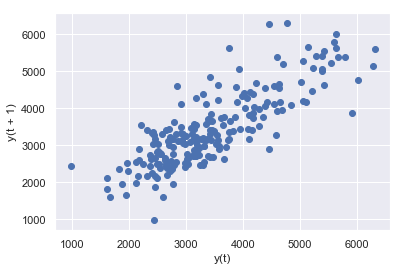

In [329]:
from pandas.plotting import lag_plot

ff=ff.sort_values('Date')
lag_plot(ff['Date'].value_counts().resample('M').sum())

### AutoCorrelation Plot (Checks lag for periodic patterns)

In an autocorrelation plot the lag is on the x-axis and the autocorrelation score is on the y-axis. The farther away the autocorrelation is from 0, the greater the influence that records that far away from each other exert on one another

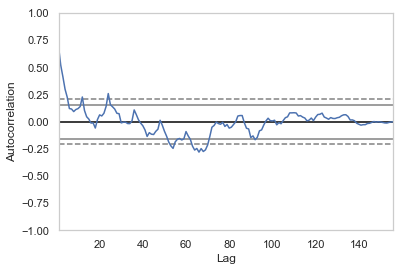

In [180]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(yy['Date'].value_counts().resample('M').sum())